# Importing libraries

In [386]:
import random
import config
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
from IPython.display import IFrame
import pprint
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

## Searching 1st playlist

In [162]:
#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [163]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [164]:
tracks=get_playlist_tracks("spotify", "4rnleEAOdmFAbRcNCgZMpY")

In [165]:
playlist = sp.user_playlist_tracks("spotify","4Dg0J0ICj9kKTGDyFu0Cv4",market="DE")

In [166]:
list_of_audio_features=[]
for item in range(0,1000):
    list_of_audio_features.append(sp.audio_features(tracks[item]["track"]["id"])[0])

In [167]:
df=pd.DataFrame(list_of_audio_features)    
df=df[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.566,0.664,-5.303,0.0464,0.634000,0.000000,0.116,0.437,128.945,3dYD57lRAUcMHufyqn9GcI,241688
1,0.768,0.820,-4.630,0.0474,0.179000,0.000000,0.689,0.625,129.965,2V4bv1fNWfTcyRJKmej6Sj,213293
2,0.558,0.559,-9.222,0.0959,0.371000,0.000007,0.109,0.620,78.558,7KA4W4McWYRpgf0fWsJZWB,180387
3,0.679,0.715,-6.383,0.0407,0.075500,0.000000,0.271,0.571,127.435,4Ub8UsjWuewQrPhuepfVpd,214148
4,0.778,0.824,-5.892,0.0707,0.284000,0.000000,0.405,0.758,100.024,3ZFTkvIE7kyPt6Nu3PEa7V,218093
...,...,...,...,...,...,...,...,...,...,...,...
995,0.577,0.983,-1.821,0.0712,0.116000,0.000316,0.149,0.216,128.011,3VPNH1HKLVFFJe7KxiG07e,179000
996,0.976,0.920,-3.646,0.2260,0.015200,0.000000,0.331,0.913,128.037,2IOvpCME5BWATj3KT1WPSD,184875
997,0.667,0.999,-4.375,0.0828,0.072600,0.000041,0.238,0.566,149.875,09uma8kvpf699ailOSlzds,248533
998,0.516,0.714,-7.124,0.0379,0.000457,0.022600,0.397,0.719,156.041,2N2vT7prULYdnOeqA0XBDy,255693


## Next Playlist (2)

In [168]:
def get_playlist_tracks2(username, playlist_id):
    results2 = sp.user_playlist_tracks2(username,playlist_id,market="DE")
    tracks2 = results2['items']
    while results2['next']:
        results2 = sp.next(results2)
        tracks2.extend(results2['items'])
    return tracks2

In [169]:
tracks2=get_playlist_tracks("spotify", "1rKNs8HKr5NPoy1KUcweFQ")

In [170]:
playlist2 = sp.user_playlist_tracks("spotify","1rKNs8HKr5NPoy1KUcweFQ",market="DE")

In [171]:
list_of_audio_features2=[]
for item in range(0,60):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features2.append(sp.audio_features(tracks2[item]["track"]["id"])[0])

In [172]:
df2=pd.DataFrame(list_of_audio_features2)    
df2=df2[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

df2

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.481,0.7380,-4.701,0.0295,0.11800,0.000007,0.0671,0.6960,86.415,0jHukeNAGGrI7npqxWVsRY,213193
1,0.341,0.7680,-7.227,0.0624,0.66900,0.000007,0.3100,0.7270,105.304,6eDQELojmRnkeGGkJ5LbA3,171507
2,0.589,0.3590,-13.181,0.0409,0.83000,0.002890,0.4160,0.3510,136.052,5TnONsGGPD0ZO7DdEq0BsL,272229
3,0.247,0.1860,-14.510,0.0315,0.49700,0.000041,0.3730,0.4160,176.162,2mTityw4Ev4D1ysp5qXl3j,414840
4,0.505,0.4910,-9.619,0.0386,0.37900,0.000000,0.1200,0.5430,109.196,3Y9TD3Wx96D14QjhuJKMHs,127720
5,0.409,0.0145,-25.122,0.0469,0.88900,0.000284,0.1170,0.1580,86.643,1vbsTEJUiOkBRN99ClLutD,163267
6,0.483,0.3210,-13.731,0.0390,0.59400,0.000008,0.1050,0.6740,100.897,35uu4l4jYnCLMh88URXqoX,133067
7,0.618,0.3900,-11.037,0.0597,0.51500,0.000005,0.0880,0.4750,72.109,6DsNL63ezp6uBSwKpvl8It,174573
8,0.247,0.2950,-9.313,0.0333,0.74900,0.000517,0.1070,0.4440,202.612,5Lk0dHPu6VRiiZ75Seww9t,187587
9,0.435,0.5780,-13.349,0.0511,0.00409,0.000000,0.0930,0.7020,97.908,1bQEtxhbN45ZIiwcJiU1Lw,256173


## Next Playlist (3)

In [173]:
#https://open.spotify.com/playlist/7vh1suA9zJijFNLGGu96oc?si=26bbc5f880244a6b
def get_playlist_tracks3(username, playlist_id):
    results3 = sp.user_playlist_tracks3(username,playlist_id,market="DE")
    tracks3 = results3['items']
    while results3['next']:
        results3 = sp.next(results3)
        tracks3.extend(results2['items'])
    return tracks3

In [174]:
tracks3=get_playlist_tracks("spotify", "7vh1suA9zJijFNLGGu96oc")

In [175]:
playlist3 = sp.user_playlist_tracks("spotify","7vh1suA9zJijFNLGGu96oc",market="DE")

In [176]:
list_of_audio_features3=[]
for item in range(0,128):
    list_of_audio_features3.append(sp.audio_features(tracks3[item]["track"]["id"])[0])

In [177]:
df3=pd.DataFrame(list_of_audio_features3)    
df3=df3[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

df3

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.877,0.544,-11.189,0.0699,0.607000,0.825,0.1730,0.349,130.029,6tSfEoK9R3hJe9MhmS0D6U,130084
1,0.817,0.648,-9.717,0.1580,0.070600,0.825,0.1020,0.378,127.007,3gN9mMN8bbluk7V9g5P0XG,470764
2,0.292,0.890,-12.649,0.0621,0.037900,0.797,0.6030,0.103,170.660,51vItd7ccBecSanoGRGvTc,335839
3,0.801,0.528,-16.709,0.0602,0.489000,0.955,0.1120,0.243,125.007,4FY6wndBNR0kvwwp09UUBu,526436
4,0.800,0.825,-12.991,0.0485,0.000006,0.886,0.0608,0.700,126.011,06xYcZSr9LpDlqL6TsIl1e,339133
...,...,...,...,...,...,...,...,...,...,...,...
123,0.703,0.566,-10.540,0.7390,0.000070,0.463,0.3520,0.417,137.961,3B9XvmwuYiiXRVC3cejRmi,403840
124,0.664,0.925,-9.177,0.0473,0.000066,0.920,0.3100,0.033,133.113,5lQilmQMgjAbgZGf5PfX31,404600
125,0.553,0.791,-10.757,0.1130,0.495000,0.812,0.1520,0.210,80.092,0izSidgmpwyPTqlpVZmxIZ,130024
126,0.696,0.594,-11.362,0.0701,0.000138,0.867,0.2630,0.123,112.057,0CJKU3HMTwwocYOVVPiCwz,181042


## Next Playlist (4)

In [178]:
#https://open.spotify.com/playlist/0KTFRDfUNyE0Q6LHz9JL2O?si=0791bd234792445c
def get_playlist_tracks4(username, playlist_id):
    results4 = sp.user_playlist_tracks4(username,playlist_id,market="DE")
    tracks4 = results4['items']
    while results4['next']:
        results4 = sp.next(results4)
        tracks4.extend(results3['items'])
    return tracks4

In [179]:
tracks4=get_playlist_tracks("spotify", "0KTFRDfUNyE0Q6LHz9JL2O")

In [180]:
playlist4 = sp.user_playlist_tracks("spotify","7vh1suA9zJijFNLGGu96oc",market="DE")

In [181]:
list_of_audio_features4=[]
for item in range(0,65):
    list_of_audio_features4.append(sp.audio_features(tracks4[item]["track"]["id"])[0])

In [182]:
df4=pd.DataFrame(list_of_audio_features4)    
df4=df4[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

df4

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.853,0.494,-10.911,0.201,0.0109,0.000884,0.2050,0.341,95.284,671sDyeE398eD0sdGuVbZU,191533
1,0.708,0.832,-4.964,0.318,0.0200,0.000003,0.1890,0.618,92.428,4kxAgnWw4GKmqcuUiXn60o,252600
2,0.782,0.597,-6.399,0.335,0.0568,0.000000,0.5820,0.528,94.631,61VlApj8p2ZaP0WTunTrKT,243133
3,0.658,0.936,-5.105,0.300,0.1720,0.000000,0.3210,0.711,95.439,3qRPc4QpHGNwKFAzCdqwxA,203000
4,0.783,0.633,-6.983,0.291,0.0969,0.000994,0.1540,0.913,100.428,6sWZn6kTuTrBkbOEQFoB3a,174800
...,...,...,...,...,...,...,...,...,...,...,...
60,0.837,0.774,-8.707,0.265,0.0267,0.000000,0.3650,0.671,91.174,4TyOdHslAsrWZyXuStT2Ay,293627
61,0.577,0.643,-4.707,0.402,0.0836,0.000000,0.1240,0.808,163.948,4OQvulvhRQvLM9riefpJMn,238157
62,0.526,0.893,-6.111,0.418,0.1700,0.000000,0.1860,0.440,174.555,2AeVg9Nf6dAHweYkDowG1J,209093
63,0.715,0.510,-9.829,0.349,0.6750,0.000000,0.0886,0.552,139.724,102cqOBzuFurH4pucMp7QY,154280


## Next Playlist (5)

In [183]:
#https://open.spotify.com/playlist/37i9dQZF1DX661EjJOj3Tu?si=a217bedb17e94978
def get_playlist_tracks5(username, playlist_id):
    results5 = sp.user_playlist_tracks5(username,playlist_id,market="DE")
    tracks5 = results5['items']
    while results5['next']:
        results5 = sp.next(results5)
        tracks5.extend(results5['items'])
    return tracks5

In [184]:
tracks5=get_playlist_tracks("spotify", "37i9dQZF1DX661EjJOj3Tu")

In [185]:
playlist5 = sp.user_playlist_tracks("spotify","7vh1suA9zJijFNLGGu96oc",market="DE")

In [186]:
list_of_audio_features5=[]
for item in range(0,100):
    list_of_audio_features5.append(sp.audio_features(tracks5[item]["track"]["id"])[0])

In [187]:
df5=pd.DataFrame(list_of_audio_features5)    
df5=df5[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

df5

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.652,0.377,-14.848,0.1760,0.845,0.000001,0.1030,0.506,143.767,1y7OxO5i6sfrHXAmUM77YG,212493
1,0.547,0.200,-16.734,0.0392,0.826,0.000038,0.1350,0.551,91.768,3eg6Yi9x0gN3k4nD4h6il3,182973
2,0.793,0.372,-15.491,0.0509,0.687,0.573000,0.1050,0.482,120.134,209ucYTS6vWEV5iydrHiOt,233544
3,0.572,0.152,-15.658,0.0408,0.961,0.000432,0.1360,0.339,127.497,4SrJyRdyHYxxkcVMQ3QkGE,254667
4,0.835,0.378,-13.510,0.0392,0.761,0.162000,0.0803,0.673,125.023,28xiVJLGLwEHNFDzXKUIdY,211192
...,...,...,...,...,...,...,...,...,...,...,...
95,0.420,0.344,-10.568,0.0509,0.919,0.000002,0.1530,0.489,161.756,6QLMwPzna66p3kuJbWQMJ4,311920
96,0.748,0.683,-8.834,0.0529,0.138,0.005890,0.0858,0.960,117.969,6kp4npBzshDFMNDJhC0uRH,290847
97,0.357,0.257,-14.582,0.0361,0.705,0.006580,0.1030,0.446,166.569,3EuORO2yfaSCohhkqOg6DI,376546
98,0.722,0.560,-10.566,0.0564,0.211,0.863000,0.0681,0.915,123.362,7IzKaEpu718xiAyPhMMmHg,357120


## Next Playlist (6)

In [188]:
#https://open.spotify.com/playlist/3Gl6lTWGIZKGRh0bg1gztN?si=f6e976e5fec24a24
def get_playlist_tracks6(username, playlist_id):
    results6 = sp.user_playlist_tracks6(username,playlist_id,market="DE")
    tracks6 = results6['items']
    while results6['next']:
        results6 = sp.next(results6)
        tracks6.extend(results6['items'])
    return tracks6

In [189]:
tracks6=get_playlist_tracks("spotify", "3Gl6lTWGIZKGRh0bg1gztN")

In [190]:
playlist6 = sp.user_playlist_tracks("spotify","3Gl6lTWGIZKGRh0bg1gztN",market="DE")

In [191]:
list_of_audio_features6=[]
for item in range(0,607):
    list_of_audio_features6.append(sp.audio_features(tracks6[item]["track"]["id"])[0])

In [192]:
df6=pd.DataFrame(list_of_audio_features6)    
df6=df6[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

df6

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.726,0.505,-11.545,0.0452,0.81900,0.049,0.1250,0.303,129.916,63dWZKazdxf9Q2zfwNHHD1,165747
1,0.707,0.802,-7.022,0.0445,0.01500,0.173,0.2860,0.919,105.001,3ixglmGBPthnKVeNHANi5Z,400823
2,0.721,0.915,-9.087,0.0424,0.00290,0.805,0.0806,0.406,105.005,0IFkKWlkRUs6QAy7Z4tVeV,498022
3,0.739,0.750,-6.916,0.0489,0.06810,0.418,0.1270,0.752,119.980,08dxa01tat82thev4QO2iu,524164
4,0.600,0.641,-10.415,0.0463,0.00608,0.827,0.1490,0.166,110.937,1Az6HNj6W3kckEFYPHD8d5,617628
...,...,...,...,...,...,...,...,...,...,...,...
602,0.688,0.756,-6.248,0.0313,0.15000,0.815,0.0758,0.611,99.988,5acFePxQYax9Qkejb1avDe,340800
603,0.884,0.770,-10.746,0.0582,0.02010,0.888,0.0956,0.448,118.786,64oayzrVAe57AE4IIPKKOf,329293
604,0.828,0.681,-9.571,0.0477,0.05540,0.908,0.0713,0.687,109.995,4HshooUWGfFp0jlzqfCnsO,302111
605,0.652,0.756,-8.988,0.0365,0.01710,0.831,0.2120,0.841,111.109,1yAXD9x09EhJHlq2qQCyuD,371875


## Next Playlist (7)

In [193]:
#https://open.spotify.com/playlist/1h0CEZCm6IbFTbxThn6Xcs?si=513dc069bc44481b
def get_playlist_tracks7(username, playlist_id):
    results7 = sp.user_playlist_tracks7(username,playlist_id,market="DE")
    tracks7 = results7['items']
    while results7['next']:
        results7 = sp.next(results7)
        tracks7.extend(results7['items'])
    return tracks7

In [194]:
tracks7=get_playlist_tracks("spotify", "1h0CEZCm6IbFTbxThn6Xcs")

In [195]:
playlist7 = sp.user_playlist_tracks("spotify","1h0CEZCm6IbFTbxThn6Xcs",market="DE")

In [196]:
list_of_audio_features7=[]
for item in range(0,160):
    list_of_audio_features7.append(sp.audio_features(tracks7[item]["track"]["id"])[0])

In [197]:
df7=pd.DataFrame(list_of_audio_features7)    
df7=df7[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

df7

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.213,0.06560,-24.810,0.0467,0.992,0.969000,0.0699,0.0384,65.023,3U8Fx7zNTQrctytkj6Gqgd,150147
1,0.330,0.00357,-33.142,0.0339,0.995,0.953000,0.0989,0.1210,100.741,6MzbO6YS0M6tjwT93hjAl0,216213
2,0.368,0.00363,-36.759,0.0350,0.993,0.922000,0.1370,0.0850,69.363,1L4NadMj3Jj7YgGaikyhfr,254000
3,0.320,0.00501,-33.366,0.0455,0.993,0.919000,0.0618,0.0383,68.947,3hCPh4oVVjaM8tv9sFH8cx,294960
4,0.701,0.34100,-12.260,0.0418,0.499,0.903000,0.3590,0.1630,105.513,5xbuJuQsTVheVZvX2AJVIv,151507
...,...,...,...,...,...,...,...,...,...,...,...
155,0.217,0.04080,-26.146,0.0379,0.994,0.912000,0.0553,0.0614,159.179,11kFCPT3e5GGpDQhX6d4sD,260973
156,0.209,0.01520,-32.064,0.0573,0.996,0.961000,0.0894,0.1490,84.292,536wHI10jgntsG8BaeiIog,73000
157,0.162,0.06820,-21.254,0.0393,0.989,0.475000,0.1160,0.0358,144.568,2TOUdZaG9w8pbGVoH0GohP,228013
158,0.130,0.08600,-21.920,0.0373,0.932,0.912000,0.1080,0.0375,90.223,3Sy6wgTNEp6vSgLs4EyXAf,391160


## Next Playlist (8)

In [198]:
#https://open.spotify.com/playlist/5TqgRiyl1aV6A8xClBK4WH?si=0d69333631394e77
def get_playlist_tracks8(username, playlist_id):
    results8 = sp.user_playlist_tracks8(username,playlist_id,market="DE")
    tracks8 = results8['items']
    while results8['next']:
        results8 = sp.next(results8)
        tracks8.extend(results8['items'])
    return tracks8

In [199]:
tracks8=get_playlist_tracks("spotify", "5TqgRiyl1aV6A8xClBK4WH")

In [200]:
playlist8 = sp.user_playlist_tracks("spotify","5TqgRiyl1aV6A8xClBK4WH",market="DE")

In [201]:
list_of_audio_features8=[]
for item in range(0,60):
    list_of_audio_features8.append(sp.audio_features(tracks8[item]["track"]["id"])[0])

In [202]:
df8=pd.DataFrame(list_of_audio_features8)    
df8=df8[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

df8

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.615,0.631,-10.792,0.0455,0.149,0.000000,0.1330,0.916,136.830,7L6CCV19CsvL7UHgR8Bzfw,189653
1,0.735,0.776,-10.060,0.2330,0.593,0.000000,0.1750,0.899,104.821,7bdhM9AJqWAIHooF4sh3wW,277933
2,0.568,0.574,-8.993,0.0683,0.468,0.000000,0.3620,0.680,107.821,2GAFZG9Z7UGS1iMm4Idrnr,235547
3,0.587,0.736,-10.100,0.2790,0.662,0.007150,0.9820,0.568,102.236,4tiN2aKOKA9p17aMRfzdld,198787
4,0.685,0.716,-7.920,0.0839,0.547,0.000026,0.1250,0.721,108.492,2vG0OdS0r1s8wPUqwGFq2W,240960
5,0.570,0.684,-9.481,0.1140,0.265,0.000000,0.3290,0.886,137.320,1S63UTfrt7aSfMz1XsGFrH,173600
6,0.338,0.927,-4.249,0.0838,0.477,0.000000,0.9410,0.651,110.086,7agsp78YRMPh9JmSQXW0nu,186440
7,0.586,0.467,-12.537,0.0493,0.401,0.000000,0.0350,0.967,91.095,5n1rcGqeRPyYhWGAxsCwnM,192933
8,0.618,0.517,-11.718,0.0372,0.551,0.000180,0.0820,0.845,90.559,5M8qYbcJYVCQG5ofJlmbJR,220053
9,0.383,0.577,-15.360,0.0549,0.283,0.003240,0.4830,0.844,94.520,2mIilAXyM0J8TPTG60Lk4o,497293


## Next Playlist (9)

In [203]:
#https://open.spotify.com/playlist/37i9dQZF1E4nmpWCqrzQnR?si=57f487bf9bbf491b
def get_playlist_tracks9(username, playlist_id):
    results9 = sp.user_playlist_tracks9(username,playlist_id,market="DE")
    tracks9 = results9['items']
    while results9['next']:
        results9 = sp.next(results9)
        tracks9.extend(results9['items'])
    return tracks9

In [204]:
tracks9=get_playlist_tracks("spotify", "37i9dQZF1E4nmpWCqrzQnR")

In [205]:
playlist9 = sp.user_playlist_tracks("spotify","37i9dQZF1E4nmpWCqrzQnR",market="DE")

In [206]:
list_of_audio_features9=[]
for item in range(0,49):
    list_of_audio_features9.append(sp.audio_features(tracks9[item]["track"]["id"])[0])

In [207]:
df9=pd.DataFrame(list_of_audio_features9)    
df9=df9[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

df9

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.509,0.791,-9.082,0.0363,0.0718,0.001420,0.2170,0.952,148.642,0eKAJJOyEyPWYKBiiCNEVD,162586
1,0.748,0.472,-14.436,0.0700,0.4260,0.000878,0.1150,0.773,124.950,3JWSeXXu5sqA7x0WZLwwHg,140200
2,0.719,0.755,-7.947,0.0326,0.2590,0.000051,0.0751,0.963,152.092,49jl97aZlTPmkKG7ta7gM0,121913
3,0.515,0.703,-6.275,0.0366,0.5510,0.000285,0.2170,0.970,159.844,54Ep1JUYHlT1sgnGdofFWA,124944
4,0.582,0.675,-8.395,0.0393,0.1700,0.000000,0.1100,0.872,87.157,42OsMkBHNP2mwGrnKOmivv,160575
5,0.301,0.858,-5.728,0.0584,0.6340,0.000004,0.8010,0.910,175.809,558hjMLhbr6TKYMxOtznVL,340802
6,0.622,0.550,-8.497,0.0409,0.4740,0.001600,0.2950,0.923,75.483,50Cp8aSCHvdDEydUmGWGNa,165627
7,0.670,0.331,-14.125,0.1070,0.6870,0.000000,0.0846,0.765,81.058,3Vtvoq3qexnukm7LmMz9M5,186293
8,0.741,0.691,-5.040,0.0496,0.2480,0.001880,0.1300,0.902,153.228,2gGECbkvruiD0YAvbLjeOj,179220
9,0.529,0.713,-6.003,0.0422,0.4700,0.000000,0.1140,0.963,109.241,3Gvu10zU4u2KoDjom2CGh6,281313


## Next Playlist (10)

In [208]:
#https://open.spotify.com/playlist/77kTyHtmYJRdkJbRbEBn9A?si=1fd31478df184a0e
def get_playlist_tracks10(username, playlist_id):
    results10 = sp.user_playlist_tracks10(username,playlist_id,market="DE")
    tracks10 = results10['items']
    while results10['next']:
        results10 = sp.next(results10)
        tracks10.extend(results10['items'])
    return tracks10

In [209]:
tracks10=get_playlist_tracks("spotify","77kTyHtmYJRdkJbRbEBn9A")

In [210]:
tracks10

[{'added_at': '1970-01-01T00:00:00Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
   'href': 'https://api.spotify.com/v1/users/',
   'id': '',
   'type': 'user',
   'uri': 'spotify:user:'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'single',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2WRStKp4ihGVUzlzWfv1Qt'},
      'href': 'https://api.spotify.com/v1/artists/2WRStKp4ihGVUzlzWfv1Qt',
      'id': '2WRStKp4ihGVUzlzWfv1Qt',
      'name': 'The Undertones',
      'type': 'artist',
      'uri': 'spotify:artist:2WRStKp4ihGVUzlzWfv1Qt'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/1JsnX6u2KqT9zY7c2UvnRa'},
    'href': 'https://api.spotify.com/v1/albums/1JsnX6u2KqT9zY7c2UvnRa',
    'id': '1JsnX6u2KqT9zY7c2UvnRa',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b2739e0edad4b8e40372948e0b87',
      'width': 640},
     {'height': 300,


In [211]:
playlist10 = sp.user_playlist_tracks("spotify","77kTyHtmYJRdkJbRbEBn9A",market="DE")

In [212]:
playlist10

{'href': 'https://api.spotify.com/v1/playlists/77kTyHtmYJRdkJbRbEBn9A/tracks?offset=0&limit=100&market=DE&additional_types=track',
 'items': [{'added_at': '1970-01-01T00:00:00Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
    'href': 'https://api.spotify.com/v1/users/',
    'id': '',
    'type': 'user',
    'uri': 'spotify:user:'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2WRStKp4ihGVUzlzWfv1Qt'},
       'href': 'https://api.spotify.com/v1/artists/2WRStKp4ihGVUzlzWfv1Qt',
       'id': '2WRStKp4ihGVUzlzWfv1Qt',
       'name': 'The Undertones',
       'type': 'artist',
       'uri': 'spotify:artist:2WRStKp4ihGVUzlzWfv1Qt'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/1JsnX6u2KqT9zY7c2UvnRa'},
     'href': 'https://api.spotify.com/v1/albums/1JsnX6u2KqT9zY7c2UvnRa',
     'id': '1JsnX6u2KqT9zY7c2UvnR

In [213]:
list_of_audio_features10=[]
for item in range(0,918):
    list_of_audio_features10.append(sp.audio_features(tracks10[item]["track"]["id"])[0])

In [214]:
df10=pd.DataFrame(list_of_audio_features10)    
df10=df10[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]
df10

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.415,0.782,-6.745,0.0461,0.001100,0.000,0.1400,0.564,135.029,4wNATViXFXHOKsGgEehnBT,148480
1,0.572,0.643,-5.915,0.0660,0.722000,0.495,0.1170,0.109,199.078,5WQwLtyRifa7JQdaYHBHBO,358053
2,0.787,0.500,-8.341,0.0590,0.417000,0.587,0.0985,0.475,148.684,5TjUUCZOzVhjXNSK4iQUYv,217500
3,0.772,0.409,-15.061,0.0355,0.089600,0.252,0.0522,0.495,125.476,7I5eQZFdlPV8LZWH2FeqaW,187720
4,0.655,0.897,-8.204,0.0763,0.005400,0.863,0.1040,0.454,124.027,6osqu07u7Hibq4SGIyHnjr,188956
...,...,...,...,...,...,...,...,...,...,...,...
913,0.339,0.955,-5.514,0.0729,0.000009,0.679,0.3270,0.253,133.754,2b1knTZauwbauvqAeQngfd,238525
914,0.297,0.938,-4.756,0.0601,0.001060,0.365,0.1700,0.203,143.989,7wTiVApNDcLxvjOU1wNHm3,163196
915,0.686,0.644,-7.286,0.0276,0.012100,0.203,0.1260,0.372,114.203,0Mb20VmqR2lvtgbEermW2v,293987
916,0.479,0.663,-8.808,0.0770,0.310000,0.107,0.1100,0.924,87.996,1Z8WrUFN8N7xYSu69CaowN,195213


# Concatenating all the 7 playlists dataframes

In [244]:
df_all_playlists = pd.concat([df, df2, df3, df4, df5, df6, df7, df8, df9, df10])
df_all_playlists

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.566,0.664,-5.303,0.0464,0.634000,0.000000,0.116,0.437,128.945,3dYD57lRAUcMHufyqn9GcI,241688
1,0.768,0.820,-4.630,0.0474,0.179000,0.000000,0.689,0.625,129.965,2V4bv1fNWfTcyRJKmej6Sj,213293
2,0.558,0.559,-9.222,0.0959,0.371000,0.000007,0.109,0.620,78.558,7KA4W4McWYRpgf0fWsJZWB,180387
3,0.679,0.715,-6.383,0.0407,0.075500,0.000000,0.271,0.571,127.435,4Ub8UsjWuewQrPhuepfVpd,214148
4,0.778,0.824,-5.892,0.0707,0.284000,0.000000,0.405,0.758,100.024,3ZFTkvIE7kyPt6Nu3PEa7V,218093
...,...,...,...,...,...,...,...,...,...,...,...
913,0.339,0.955,-5.514,0.0729,0.000009,0.679000,0.327,0.253,133.754,2b1knTZauwbauvqAeQngfd,238525
914,0.297,0.938,-4.756,0.0601,0.001060,0.365000,0.170,0.203,143.989,7wTiVApNDcLxvjOU1wNHm3,163196
915,0.686,0.644,-7.286,0.0276,0.012100,0.203000,0.126,0.372,114.203,0Mb20VmqR2lvtgbEermW2v,293987
916,0.479,0.663,-8.808,0.0770,0.310000,0.107000,0.110,0.924,87.996,1Z8WrUFN8N7xYSu69CaowN,195213


# Cleaning the dataframe

## Finding duplicates rows

In [245]:
print(df_all_playlists.duplicated().sum())

78


## Getting rid of the duplicates

In [246]:
df_all_playlists= df_all_playlists.drop_duplicates()

In [218]:
df_all_playlists

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.566,0.664,-5.303,0.0464,0.634000,0.000000,0.116,0.437,128.945,3dYD57lRAUcMHufyqn9GcI,241688
1,0.768,0.820,-4.630,0.0474,0.179000,0.000000,0.689,0.625,129.965,2V4bv1fNWfTcyRJKmej6Sj,213293
2,0.558,0.559,-9.222,0.0959,0.371000,0.000007,0.109,0.620,78.558,7KA4W4McWYRpgf0fWsJZWB,180387
3,0.679,0.715,-6.383,0.0407,0.075500,0.000000,0.271,0.571,127.435,4Ub8UsjWuewQrPhuepfVpd,214148
4,0.778,0.824,-5.892,0.0707,0.284000,0.000000,0.405,0.758,100.024,3ZFTkvIE7kyPt6Nu3PEa7V,218093
...,...,...,...,...,...,...,...,...,...,...,...
913,0.339,0.955,-5.514,0.0729,0.000009,0.679000,0.327,0.253,133.754,2b1knTZauwbauvqAeQngfd,238525
914,0.297,0.938,-4.756,0.0601,0.001060,0.365000,0.170,0.203,143.989,7wTiVApNDcLxvjOU1wNHm3,163196
915,0.686,0.644,-7.286,0.0276,0.012100,0.203000,0.126,0.372,114.203,0Mb20VmqR2lvtgbEermW2v,293987
916,0.479,0.663,-8.808,0.0770,0.310000,0.107000,0.110,0.924,87.996,1Z8WrUFN8N7xYSu69CaowN,195213


# Saving dataframe in a csv version

In [247]:
df_all_playlists = df_all_playlists.reset_index(drop=True)

In [248]:
df_all_playlists

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.566,0.664,-5.303,0.0464,0.634000,0.000000,0.116,0.437,128.945,3dYD57lRAUcMHufyqn9GcI,241688
1,0.768,0.820,-4.630,0.0474,0.179000,0.000000,0.689,0.625,129.965,2V4bv1fNWfTcyRJKmej6Sj,213293
2,0.558,0.559,-9.222,0.0959,0.371000,0.000007,0.109,0.620,78.558,7KA4W4McWYRpgf0fWsJZWB,180387
3,0.679,0.715,-6.383,0.0407,0.075500,0.000000,0.271,0.571,127.435,4Ub8UsjWuewQrPhuepfVpd,214148
4,0.778,0.824,-5.892,0.0707,0.284000,0.000000,0.405,0.758,100.024,3ZFTkvIE7kyPt6Nu3PEa7V,218093
...,...,...,...,...,...,...,...,...,...,...,...
3064,0.339,0.955,-5.514,0.0729,0.000009,0.679000,0.327,0.253,133.754,2b1knTZauwbauvqAeQngfd,238525
3065,0.297,0.938,-4.756,0.0601,0.001060,0.365000,0.170,0.203,143.989,7wTiVApNDcLxvjOU1wNHm3,163196
3066,0.686,0.644,-7.286,0.0276,0.012100,0.203000,0.126,0.372,114.203,0Mb20VmqR2lvtgbEermW2v,293987
3067,0.479,0.663,-8.808,0.0770,0.310000,0.107000,0.110,0.924,87.996,1Z8WrUFN8N7xYSu69CaowN,195213


In [251]:
df_all_playlists.to_csv('df_all_playlists.csv', index=False)

# Lab_Project_Spotify_W6_D3

1- load the pandas data frame songs of the audio features (minimum 500 songs as diverse as possible))
2- standardise the data using standardscaler (using fit and then transform)
3- save the scaler for future use for the new user input song. save it using pickle
4- choosing the number of clusters k.
5- fitting k means cluster.
6- build the elbow graph to find the best k.
7- use the model with the best k to assign every observation in your data frame to its cluster number ( adding cluster columns to the pandas data frame) using model.predict
8-save the model with the best k as your final model using pickle.
for the user input tasks and the full scenario:
1- get the song name from the user as an input
2- play the input song in music embed player.
3- get the audio features for that song from spotify API. using sp.audio_features(trackid) . pay attention to keep only the audio features columns.
4- load the standardscaler using pickle and use it to scale the new song. (scaler.transform)
5- using mode.predict(new scaled audio record for the new song) to predict the cluster (label) for the new song.
6- return random song from the same cluster that the new song belongs to from your data frame and suggest it to the user.
7- play it using embedded music player. (edited) 

In [298]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

## Load the pandas data frame songs of the audio features (minimum 500 songs as diverse as possible))

In [299]:
df_all_playlists = pd.read_csv('df_all_playlists.csv')
df_all_playlists

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.566,0.664,-5.303,0.0464,0.634000,0.000000,0.116,0.437,128.945,3dYD57lRAUcMHufyqn9GcI,241688
1,0.768,0.820,-4.630,0.0474,0.179000,0.000000,0.689,0.625,129.965,2V4bv1fNWfTcyRJKmej6Sj,213293
2,0.558,0.559,-9.222,0.0959,0.371000,0.000007,0.109,0.620,78.558,7KA4W4McWYRpgf0fWsJZWB,180387
3,0.679,0.715,-6.383,0.0407,0.075500,0.000000,0.271,0.571,127.435,4Ub8UsjWuewQrPhuepfVpd,214148
4,0.778,0.824,-5.892,0.0707,0.284000,0.000000,0.405,0.758,100.024,3ZFTkvIE7kyPt6Nu3PEa7V,218093
...,...,...,...,...,...,...,...,...,...,...,...
3064,0.339,0.955,-5.514,0.0729,0.000009,0.679000,0.327,0.253,133.754,2b1knTZauwbauvqAeQngfd,238525
3065,0.297,0.938,-4.756,0.0601,0.001060,0.365000,0.170,0.203,143.989,7wTiVApNDcLxvjOU1wNHm3,163196
3066,0.686,0.644,-7.286,0.0276,0.012100,0.203000,0.126,0.372,114.203,0Mb20VmqR2lvtgbEermW2v,293987
3067,0.479,0.663,-8.808,0.0770,0.310000,0.107000,0.110,0.924,87.996,1Z8WrUFN8N7xYSu69CaowN,195213


## Creating a new variable "X" without feauture variables

In [376]:
X=pd.DataFrame(list_of_audio_features)    
X=df_all_playlists[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","duration_ms"]]

X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.566,0.664,-5.303,0.0464,0.634000,0.000000,0.116,0.437,128.945,241688
1,0.768,0.820,-4.630,0.0474,0.179000,0.000000,0.689,0.625,129.965,213293
2,0.558,0.559,-9.222,0.0959,0.371000,0.000007,0.109,0.620,78.558,180387
3,0.679,0.715,-6.383,0.0407,0.075500,0.000000,0.271,0.571,127.435,214148
4,0.778,0.824,-5.892,0.0707,0.284000,0.000000,0.405,0.758,100.024,218093
...,...,...,...,...,...,...,...,...,...,...
3064,0.339,0.955,-5.514,0.0729,0.000009,0.679000,0.327,0.253,133.754,238525
3065,0.297,0.938,-4.756,0.0601,0.001060,0.365000,0.170,0.203,143.989,163196
3066,0.686,0.644,-7.286,0.0276,0.012100,0.203000,0.126,0.372,114.203,293987
3067,0.479,0.663,-8.808,0.0770,0.310000,0.107000,0.110,0.924,87.996,195213


## Standardise the data using standardscaler (using fit and then transform)

In [301]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [302]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.566,0.664,-5.303,0.0464,0.6340,0.000000,0.116,0.437,128.945,241688
1,0.768,0.820,-4.630,0.0474,0.1790,0.000000,0.689,0.625,129.965,213293
2,0.558,0.559,-9.222,0.0959,0.3710,0.000007,0.109,0.620,78.558,180387
3,0.679,0.715,-6.383,0.0407,0.0755,0.000000,0.271,0.571,127.435,214148
4,0.778,0.824,-5.892,0.0707,0.2840,0.000000,0.405,0.758,100.024,218093


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.286021,-0.053787,0.669667,-0.396106,1.534749,-0.831707,-0.413306,-0.394946,0.222072,-0.222117
1,0.904261,0.642156,0.792064,-0.382495,-0.053907,-0.831707,3.227374,0.311350,0.261313,-0.424035
2,-0.333160,-0.522211,-0.043073,0.277644,0.616471,-0.831688,-0.457782,0.292566,-1.716372,-0.658032
3,0.379830,0.173732,0.473250,-0.473690,-0.415283,-0.831707,0.571520,0.108478,0.163981,-0.417955
4,0.963186,0.660000,0.562547,-0.065356,0.312706,-0.831707,1.422918,0.811017,-0.890551,-0.389902


In [303]:
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

## Scaling features

In [304]:
X.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3.069000e+03
mean,0.614540,0.676057,-8.985162,0.075502,0.194439,0.315695,0.181050,0.542126,123.172560,2.729234e+05
std,0.169735,0.224193,5.499394,0.073481,0.286452,0.379637,0.157414,0.266220,25.997755,1.406489e+05
min,0.065900,0.000707,-43.657000,0.024000,0.000001,0.000000,0.020000,0.027700,57.439000,5.016000e+04
25%,0.520000,0.564000,-10.953000,0.038200,0.006190,0.000006,0.087800,0.336000,105.999000,2.023330e+05
50%,0.638000,0.725000,-7.668000,0.049200,0.049100,0.032900,0.117000,0.562000,123.025000,2.364400e+05
75%,0.736000,0.841000,-5.410000,0.076300,0.257000,0.767000,0.218000,0.760000,135.207000,3.135730e+05
max,0.980000,0.999000,-0.525000,0.868000,0.996000,0.987000,0.989000,0.983000,220.356000,3.722367e+06


## Save the scaler using pickle for future use for the new user input song.

In [305]:
from pickle import dump

In [306]:
dump(scaler, open('X_scaled_df.pkl', 'wb'))

## Choosing the number of clusters k, fitting k means cluster.

### Build the elbow graph to find the best k.

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

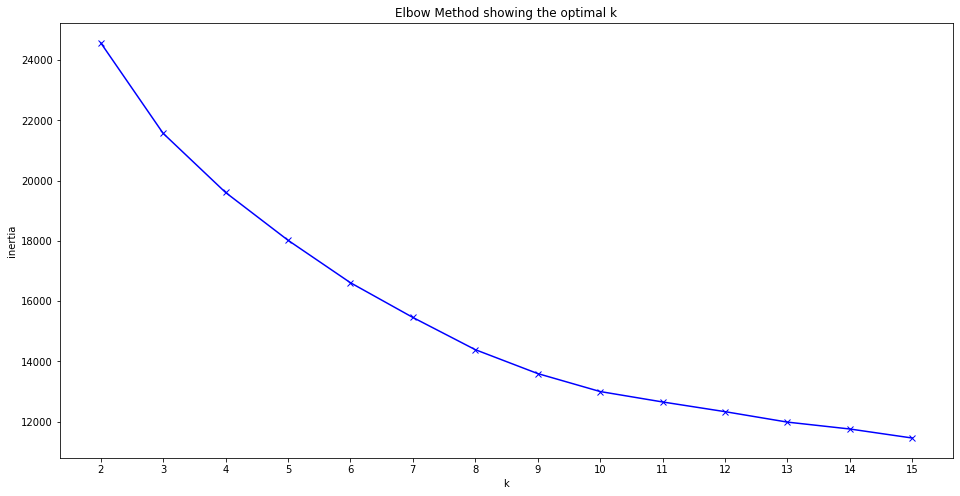

In [316]:
K = range(2, 16)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

There not seems to be an elbow, then, we will use another metric that will help us decide better, 
**Silhouette Score** 

In [317]:
kmeans2 = KMeans(n_clusters=8,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

15525.17557536246


## Use the model with the best k to assign every observation in your data frame to its cluster number (adding cluster columns to the pandas data frame) using model.predict
 ### save the model with the best k as your final model using pickle.

In [378]:
kmeans2.labels_

array([0, 5, 0, ..., 4, 0, 1], dtype=int32)

In [379]:
df_all_playlists['cluster']= kmeans2.labels_

In [380]:
df_all_playlists

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,cluster
0,0.566,0.664,-5.303,0.0464,0.634000,0.000000,0.116,0.437,128.945,3dYD57lRAUcMHufyqn9GcI,241688,0
1,0.768,0.820,-4.630,0.0474,0.179000,0.000000,0.689,0.625,129.965,2V4bv1fNWfTcyRJKmej6Sj,213293,5
2,0.558,0.559,-9.222,0.0959,0.371000,0.000007,0.109,0.620,78.558,7KA4W4McWYRpgf0fWsJZWB,180387,0
3,0.679,0.715,-6.383,0.0407,0.075500,0.000000,0.271,0.571,127.435,4Ub8UsjWuewQrPhuepfVpd,214148,4
4,0.778,0.824,-5.892,0.0707,0.284000,0.000000,0.405,0.758,100.024,3ZFTkvIE7kyPt6Nu3PEa7V,218093,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3064,0.339,0.955,-5.514,0.0729,0.000009,0.679000,0.327,0.253,133.754,2b1knTZauwbauvqAeQngfd,238525,1
3065,0.297,0.938,-4.756,0.0601,0.001060,0.365000,0.170,0.203,143.989,7wTiVApNDcLxvjOU1wNHm3,163196,1
3066,0.686,0.644,-7.286,0.0276,0.012100,0.203000,0.126,0.372,114.203,0Mb20VmqR2lvtgbEermW2v,293987,4
3067,0.479,0.663,-8.808,0.0770,0.310000,0.107000,0.110,0.924,87.996,1Z8WrUFN8N7xYSu69CaowN,195213,0


In [318]:
with open("X_scaled_df.pkl", "wb") as f:
    pickle.dump(kmeans,f)

In [319]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 

In [320]:
scaler2 = load("X_scaled_df.pkl")

# For the user input tasks and the full scenario:

for the user input tasks and the full scenario:
1- get the song name from the user as an input
2- play the input song in music embed player.
3- get the audio features for that song from spotify API. using sp.audio_features(trackid) . pay attention to keep only the audio features columns.
4- load the standardscaler using pickle and use it to scale the new song. (scaler.transform)
5- using mode.predict(new scaled audio record for the new song) to predict the cluster (label) for the new song.
6- return random song from the same cluster that the new song belongs to from your data frame and suggest it to the user.
7- play it using embedded music player. (edited) 

## Get the song name from the user as an input

In [392]:
#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [453]:
user=input("Your Choice ")

KeyboardInterrupt: Interrupted by user

In [431]:
results = sp.search(q=user,limit=3,market="DE")
results
json_results = json.dumps(results, ensure_ascii=True)
json_results
results['tracks']['items'][0]['external_urls']["spotify"]

'https://open.spotify.com/track/4SE7wJ6HNrxGf7RpAVyTwm'

In [432]:
# The "sp" variable has two useful funtions:
# The first usefull function is:
# .search(q='',limit=n)
# .search(q="track:"+song_name+" artist:"+artist_name,limit=5) to restrict to a song name and artist.
# Where the "q" keyword is the query you want to perform on spotify: song_name, artist,...
# while The "limit" keyword will limit the number of returned results.
#
# The second usefull function is:
# .audio_features([URL|URI|ID])
# which returns some 'features of the song', that after cleanup, we can use in order to characterize a song.

In [435]:
track_id=results["tracks"]["items"][0]["id"]
track_id

'4SE7wJ6HNrxGf7RpAVyTwm'

## Play the input song in music embed player.

In [436]:
from IPython.display import IFrame


IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

## Get the audio features for that song from spotify API. using sp.audio_features(trackid) . pay attention to keep only the audio features columns.

In [437]:
Audio_features=sp.audio_features(track_id)
Audio_features

[{'danceability': 0.883,
  'energy': 0.721,
  'key': 9,
  'loudness': -7.494,
  'mode': 1,
  'speechiness': 0.374,
  'acousticness': 0.17,
  'instrumentalness': 0.000602,
  'liveness': 0.252,
  'valence': 0.371,
  'tempo': 94.977,
  'type': 'audio_features',
  'id': '4SE7wJ6HNrxGf7RpAVyTwm',
  'uri': 'spotify:track:4SE7wJ6HNrxGf7RpAVyTwm',
  'track_href': 'https://api.spotify.com/v1/tracks/4SE7wJ6HNrxGf7RpAVyTwm',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4SE7wJ6HNrxGf7RpAVyTwm',
  'duration_ms': 154399,
  'time_signature': 4}]

In [438]:
DF_Audio_features=pd.DataFrame(Audio_features)    
DF_Audio_features=DF_Audio_features[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","duration_ms"]]

DF_Audio_features

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.883,0.721,-7.494,0.374,0.17,0.000602,0.252,0.371,94.977,154399


## Load the standardscaler using pickle and use it to scale the new song. (scaler.transform)

In [439]:
X_scaled = scaler.transform(DF_Audio_features)
X_scaled

array([[ 1.58189625,  0.20049953,  0.27119447,  4.06289214, -0.08533125,
        -0.83012146,  0.45079923, -0.64290164, -1.08471503, -0.84283398]])

In [440]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.566,0.664,-5.303,0.0464,0.6340,0.000000,0.116,0.437,128.945,241688
1,0.768,0.820,-4.630,0.0474,0.1790,0.000000,0.689,0.625,129.965,213293
2,0.558,0.559,-9.222,0.0959,0.3710,0.000007,0.109,0.620,78.558,180387
3,0.679,0.715,-6.383,0.0407,0.0755,0.000000,0.271,0.571,127.435,214148
4,0.778,0.824,-5.892,0.0707,0.2840,0.000000,0.405,0.758,100.024,218093


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.286021,-0.053787,0.669667,-0.396106,1.534749,-0.831707,-0.413306,-0.394946,0.222072,-0.222117
1,0.904261,0.642156,0.792064,-0.382495,-0.053907,-0.831707,3.227374,0.311350,0.261313,-0.424035
2,-0.333160,-0.522211,-0.043073,0.277644,0.616471,-0.831688,-0.457782,0.292566,-1.716372,-0.658032
3,0.379830,0.173732,0.473250,-0.473690,-0.415283,-0.831707,0.571520,0.108478,0.163981,-0.417955
4,0.963186,0.660000,0.562547,-0.065356,0.312706,-0.831707,1.422918,0.811017,-0.890551,-0.389902


## Using mode.predict (new scaled audio record for the new song) to predict the cluster (label) for the new song.

In [441]:
with open("scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)
with open("kmeans2.pickle", "wb") as f:
    pickle.dump(kmeans2,f)

In [442]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 


In [443]:
scaler = load("scaler.pickle")

In [444]:
scaler

StandardScaler()

In [445]:
kmeans2 = load("kmeans2.pickle")

In [446]:
X_scaled = scaler.transform(DF_Audio_features)
X_scaled

array([[ 1.58189625,  0.20049953,  0.27119447,  4.06289214, -0.08533125,
        -0.83012146,  0.45079923, -0.64290164, -1.08471503, -0.84283398]])

In [447]:
prediction = kmeans2.predict(X_scaled)
prediction[0]

/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


6

In [448]:
pepito=df_all_playlists.loc[df_all_playlists['cluster']==prediction[0]]
pepito.reset_index(drop=True)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,cluster
0,0.327,0.941,-3.294,0.353,0.023100,0.000000,0.0636,0.707,129.738,6ku3i5WNrsY3qhOq6ua9TL,199236,6
1,0.472,0.815,-4.002,0.319,0.171000,0.000000,0.2650,0.810,98.017,2N2QvMYwyYHE8V4KZbbG4i,230413,6
2,0.781,0.526,-6.986,0.293,0.063300,0.000000,0.0457,0.665,94.993,6CjtS2JZH9RkDz5UVInsa9,235613,6
3,0.727,0.937,-2.871,0.286,0.004170,0.000000,0.0910,0.749,132.067,03UrZgTINDqvnUMbbIMhql,219493,6
4,0.504,0.912,-2.867,0.259,0.199000,0.000000,0.1050,0.248,189.983,43lwHSTEexXRVVeXZtAtfi,218539,6
...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.410,0.763,-7.904,0.337,0.273000,0.000013,0.0553,0.649,171.956,61QW3AcU1jm5ttPOn8eZhn,284333,6
158,0.565,0.643,-10.458,0.194,0.034800,0.000007,0.1630,0.440,126.108,2XIApoZ0V3uvwevp22F037,202533,6
159,0.493,0.928,-10.383,0.218,0.000904,0.048500,0.2770,0.134,184.123,7vz1s6nP6MqXnJM3tQTMB8,269853,6
160,0.841,0.234,-8.957,0.262,0.035500,0.824000,0.1240,0.710,113.640,23H3LRtd2g1j0ab4NdT5pz,195394,6


In [449]:
pepito_idlist = (pepito['id']).to_list()

In [450]:
pepito_idlist

['6ku3i5WNrsY3qhOq6ua9TL',
 '2N2QvMYwyYHE8V4KZbbG4i',
 '6CjtS2JZH9RkDz5UVInsa9',
 '03UrZgTINDqvnUMbbIMhql',
 '43lwHSTEexXRVVeXZtAtfi',
 '0WSjVLITbxV6kVXndziQDm',
 '3QGsuHI8jO1Rx4JWLUh9jd',
 '4iMu9le3ytNO3tvgVpQANx',
 '1j76V9cJO7O9gzEK3mHw4i',
 '7hiBhOh4s8G0xmGYBAjyuw',
 '4CDIEKHMb2MBgvgHBkhiJD',
 '561jH07mF1jHuk7KlaeF0s',
 '5masKPHeAOVNgxdLebIcK7',
 '1HOlb9rdNOmy9b1Fakicjo',
 '5MhsZlmKJG6X5kTHkdwC4B',
 '70ATm56tH7OrQ1zurYssz0',
 '5D2mYZuzcgjpchVY1pmTPh',
 '0WC1Xkm3sJ7qBKx8q2WZXj',
 '1rEE9uPXdjBNa35RNPtJb3',
 '1ia019RqDK2o4QiANR1Dyn',
 '34B7h0Yn3U1BkUhrWBL6GS',
 '0qQ2TDJ42jGaEHE5cJAuG5',
 '0Etjx0wbI3vCJAA054J5ZY',
 '2cY7WSxFIsZQaoDNJe7Fz3',
 '66Q3fAmSX5eHamgbKa9alP',
 '3S6Qk3eJctunBqcqC3jmcE',
 '6rv5csQ4fE8sYTpe4bAHVG',
 '61BqwgSRTyWH9M4uPjsC3B',
 '2I7Dw7W2CFvfc51qqUhfbl',
 '76fqWMe0buqQoaNTIbLWmr',
 '6tyMthQ4xFIyvun12lAHPB',
 '0o4bVNT3sZCAiR4blvpeYt',
 '6ZSO7kPn8IMJFymyticbJO',
 '343YBumqHu19cGoGARUTsd',
 '5YEOzOojehCqxGQCcQiyR4',
 '2LvRR121MWFmmEGkuV2vQP',
 '6lmtMjxyKYGIej1e3kg198',
 

In [451]:
recomendation=random.choice(pepito_idlist)
recomendation

'56DPW47j6NZnRye792oACa'

## Play it using embedded music player. (edited)

In [452]:
IFrame(src="https://open.spotify.com/embed/track/"+recomendation,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",)

# Final Function

In [456]:
user=input("Your Choice")

results = sp.search(q=user,limit=3,market="DE")
results
json_results = json.dumps(results, ensure_ascii=True)
json_results
results['tracks']['items'][0]['external_urls']["spotify"]


track_id=results["tracks"]["items"][0]["id"]



IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",)

Audio_features=sp.audio_features(track_id)


DF_Audio_features=pd.DataFrame(Audio_features)    
DF_Audio_features=DF_Audio_features[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","duration_ms"]]

DF_Audio_features


X_scaled = scaler.transform(DF_Audio_features)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

with open("scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)
with open("kmeans2.pickle", "wb") as f:
    pickle.dump(kmeans2,f)
    
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 
        
scaler = load("scaler.pickle")

kmeans2 = load("kmeans2.pickle")

X_scaled = scaler.transform(DF_Audio_features)

prediction = kmeans2.predict(X_scaled)
prediction[0]

pepito=df_all_playlists.loc[df_all_playlists['cluster']==prediction[0]]
pepito.reset_index(drop=True)

pepito_idlist = (pepito['id']).to_list()

recomendation=random.choice(pepito_idlist)

IFrame(src="https://open.spotify.com/embed/track/"+recomendation,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",)

Your ChoiceSub Zero


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.566,0.664,-5.303,0.0464,0.6340,0.000000,0.116,0.437,128.945,241688
1,0.768,0.820,-4.630,0.0474,0.1790,0.000000,0.689,0.625,129.965,213293
2,0.558,0.559,-9.222,0.0959,0.3710,0.000007,0.109,0.620,78.558,180387
3,0.679,0.715,-6.383,0.0407,0.0755,0.000000,0.271,0.571,127.435,214148
4,0.778,0.824,-5.892,0.0707,0.2840,0.000000,0.405,0.758,100.024,218093


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.286021,-0.053787,0.669667,-0.396106,1.534749,-0.831707,-0.413306,-0.394946,0.222072,-0.222117
1,0.904261,0.642156,0.792064,-0.382495,-0.053907,-0.831707,3.227374,0.311350,0.261313,-0.424035
2,-0.333160,-0.522211,-0.043073,0.277644,0.616471,-0.831688,-0.457782,0.292566,-1.716372,-0.658032
3,0.379830,0.173732,0.473250,-0.473690,-0.415283,-0.831707,0.571520,0.108478,0.163981,-0.417955
4,0.963186,0.660000,0.562547,-0.065356,0.312706,-0.831707,1.422918,0.811017,-0.890551,-0.389902


/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
